In [1]:
import rebound 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [13]:
#geeramos el disco

In [49]:
#condiciones iniciales
ri = 2
rout = 3.5
resolution = 500 #número de partículas

In [50]:
#para generer una distribución uniforme, se le otorgan distancias dentro de un disco a las partículas de forma random dadas por:
def random_nonbiased(ri, rout, n):
    u = np.random.random(n)
    r = np.sqrt(ri**2 + (rout**2 - ri**2)*u)
    theta = 2*np.pi*np.random.random(n)
    xu = r*np.cos(theta)
    yu = r*np.sin(theta)
    return(xu, yu)

/var/folders/k5/w8xx99tj1pbf6zl729f73m240000gn/T/ipykernel_1589/3627697076.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


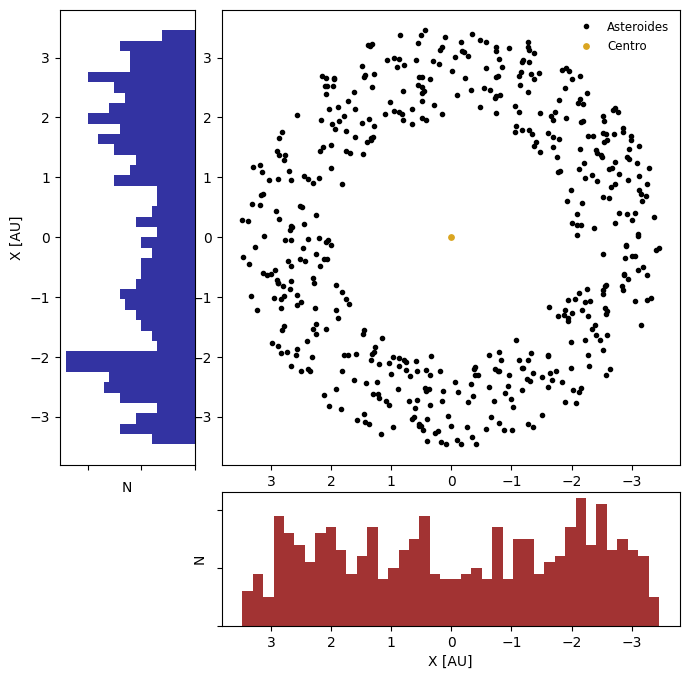

In [59]:
#analizamos la distribución generando histogramas a los ejex X e Y

x_random, y_random = random_nonbiased(ri, rout, resolution)

fig = plt.figure(figsize=(8,8))
grid = plt.GridSpec(4,4, hspace = 0.2, wspace = 0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0], xticklabels = [], sharey = main_ax)
x_hist = fig.add_subplot(grid[-1,1:], yticklabels = [], sharex = main_ax)

main_ax.plot(x_random,y_random, 'ok', markersize=3, label = 'Asteroides')
main_ax.scatter(0,0, s = 15, color = 'goldenrod', label = 'Centro')
main_ax.legend(framealpha = 0, fontsize = 8.5)

x_hist.hist(x_random, 40, histtype='stepfilled', orientation = 'vertical', color = 'darkred', alpha = .8)
x_hist.invert_xaxis()
x_hist.set_xlabel('X [AU]')
x_hist.set_ylabel('N')

y_hist.hist(y_random, 40, histtype='stepfilled', orientation = 'horizontal', color = 'darkblue', alpha = .8)
y_hist.invert_xaxis()
y_hist.set_ylabel('X [AU]')
y_hist.set_xlabel('N')

plt.tight_layout()

In [17]:
#ahora continuamos con la simulación considerando solo Júpiter

In [102]:
t_end = 500 #los años que dejaremos corriendo la simulación, de querer dejarlo 1000, se cambia el dato
nout = 2000 #cantidad de outputs que queremos, mietras mayor sea, mejor la resolución

#condiciones iniciales

ri = 2 #radio interno del disco
rout = 3.5 #radio externo del disco

n = 500 #número de particulas sin masa
nm = 2 #número particulas con masa

N = n + nm #número de partículas totales

#generamos arrays vacios de las posiciones
x = np.zeros((N, nout))
y = np.zeros((N, nout))
z = np.zeros((N, nout))

#generamos arrays vacios de las velocidades
vx = np.zeros((N, nout))
vy = np.zeros((N, nout))
vz = np.zeros((N, nout))

dt = 1e-4 #intervalos de tiempo
times = np.linspace(0, t_end, nout)

#comenzamos con la simulación una vez determinadas las condiciones iniciales
sim = rebound.Simulation()
sim.integrator = 'whfast'
sim.dt = dt
sim.units = ('yr', 'AU', 'Msun') #unidades a utilizar: años para el tiempo, unidades astronómicas para la distancia y masas solares para la masa
sim.move_to_com() #coloca la simulación en el centro de masa

xd, yd = random_nonbiased(ri, rout, n) #generamos las posiciones en X e Y
zd = np.zeros(n)

a = np.sqrt(xd**2 + yd**2 + zd**2) #convertimos las distancias cartecianas a un radio
theta = np.linspace(0, 2*np.pi, n)

sim.add('Sun') #agregamos la información del Sol
sim.add('599') #agregamos la información de Júpiter

for i in range(n):
  sim.add(a=a[i], e=0, inc=0, f=theta[i]) #agregamos la información de cada partícula


Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for '599'... 
Found: Jupiter (599) 


In [ ]:
#corremos la simulación, integrando en el tiempo
ps = sim.particles
for i, time in tqdm(enumerate(times), 'procesanddo: '):
  sim.integrate(time)
  for j in range(sim.N):
    x[j,i] = ps[j].x
    y[j,i] = ps[j].y
    z[j,i] = ps[j].z

    vx[j,i] = ps[j].vx
    vy[j,i] = ps[j].vy
    vz[j,i] = ps[j].vz


procesanddo: : 282it [53:48, 12.52s/it]

In [ ]:
#el siguiente paso no es necesario correrlo por el tiempo, los datos pueden ser encontrados en el Github

In [101]:
#Guardamos los datos para analizarlos posteriormente, el nombre se debe cambiar para correrlo por 1000 años!
np.save('posxsolojup500años.npy', x)
np.save('posysolojup500años.npy', y)

In [ ]:
#ahora continuamos con la simulación considerando Marte, Júpiter y Saturno

In [3]:
t_end = 500 #los años que dejaremos corriendo la simulación, de querer dejarlo 1000, se cambia el dato
nout = 2000#cantidad de outputs que queremos

#condiciones iniciales

ri = 2 #radio interno del disco
rout = 3.5 #radio externo del disco

n = 500 #n de particulas sin masa
nm = 4 #nm particulas con masa

N = n + nm #número de partículas totales

#generamos arrays vacios de las posiciones
x = np.zeros((N, nout))
y = np.zeros((N, nout))
z = np.zeros((N, nout))

#generamos arrays vacios de las velocidades
vx = np.zeros((N, nout))
vy = np.zeros((N, nout))
vz = np.zeros((N, nout))

dt = 1e-4 #intervalos de tiempo
times = np.linspace(0, t_end, nout)

#comenzamos con la simulación una vez determinadas las condiciones iniciales
sim = rebound.Simulation()
sim.integrator = 'whfast'
sim.dt = dt
sim.units = ('yr', 'AU', 'Msun') #unidades a utilizar
sim.move_to_com()#coloca la simulación en el centro de masa

xd, yd = random_nonbiased(ri, rout, n) #generamos las posiciones en X e Y
zd = np.zeros(n)

a = np.sqrt(xd**2 + yd**2 + zd**2) #convertimos las distancias cartecianas a un radio
theta = np.linspace(0, 2*np.pi, n)

sim.add('Sun') #agregamos la información del Sol
sim.add('499') #agregamos la información de Marte
sim.add('599') #agregamos la información de Júpiter
sim.add('699') #agregamos la información de Saturno

for i in range(n):
  sim.add(a=a[i], e=0, inc=0, f=theta[i]) #agregamos la información de cada partícula


Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for '499'... 
Found: Mars (499) 
Searching NASA Horizons for '599'... 
Found: Jupiter (599) 
Searching NASA Horizons for '699'... 
Found: Saturn (699) 


In [ ]:
#el siguiente paso no es necesario correrlo por el tiempo, los datos pueden ser encontrados en el Github

In [4]:
#corremos la simulación, integrando en el tiempo
ps = sim.particles
for i, time in tqdm(enumerate(times), 'procesanddo: '):
  sim.integrate(time)
  for j in range(sim.N):
    x[j,i] = ps[j].x
    y[j,i] = ps[j].y
    z[j,i] = ps[j].z

    vx[j,i] = ps[j].vx
    vy[j,i] = ps[j].vy
    vz[j,i] = ps[j].vz

procesanddo: : 5000it [3:11:50,  2.30s/it]


In [5]:
#Guardamos los datos para analizarlos posteriormente, el nombre se debe cambiar para correrlo por 1000 años!
np.save('posxmarjupsat500años.npy', x)
np.save('posymarjupsat500años.npy', y)